<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [17]:
# Import library
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

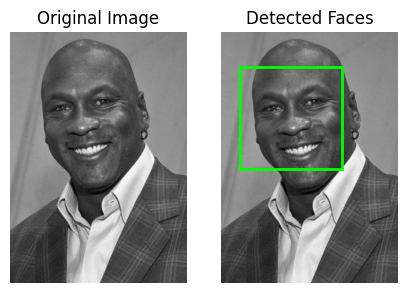

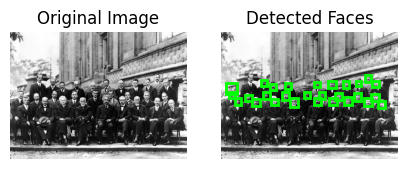

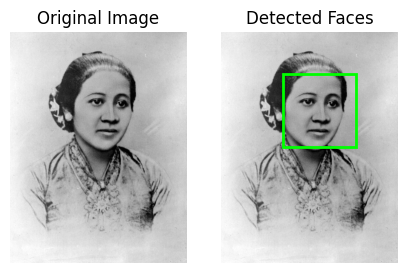

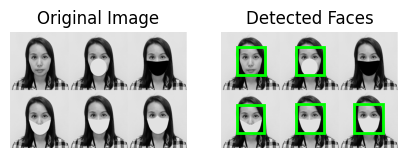

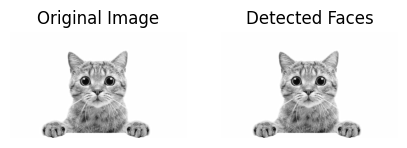

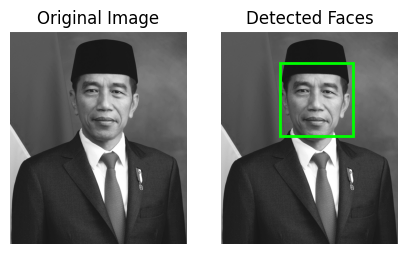

In [86]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/dataset/facedet'

# List of images to display
display_images = ['jokowi.jpg', 'kucing.jpg', 'kartini.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the image is in the list of images to display
    if filename in display_images:
        # Create the full path to the image file
        filepath = os.path.join(folder_path, filename)

        # Read the input image
        img = cv2.imread(filepath)

        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display the original and detected image using matplotlib
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

        # Display the original grayscale image
        ax1.imshow(gray, cmap='gray')
        ax1.set_title('Original Image')
        ax1.axis('off')

        # Detect faces
        faces = face_cascade.detectMultiScale(gray)

        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=(0, 1, 0), facecolor='none')
            ax2.add_patch(rect)

        # Display the image with rectangles
        ax2.imshow(gray, cmap='gray')
        ax2.set_title('Detected Faces')
        ax2.axis('off')

        # Show the plot
        plt.show()

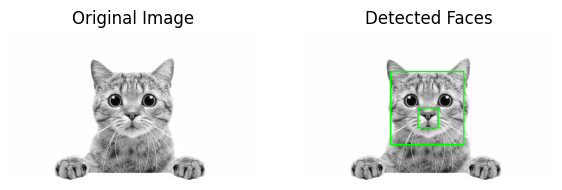

In [110]:
# Load the cascade for cat faces
cat_face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalcatface_extended.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/kucing.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect cat faces
cat_faces = cat_face_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the cat faces
for (x, y, w, h) in cat_faces:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Faces')
axes[1].axis('off')

plt.show()

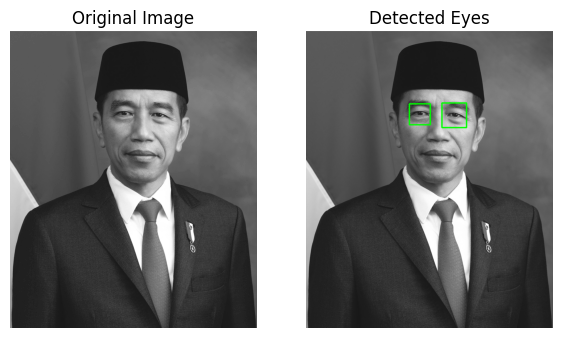

In [113]:
# Load the cascade for eye detection
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_eye.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/jokowi.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect eyes
eyes = eye_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the eyes
for (x, y, w, h) in eyes:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles around eyes
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Eyes')
axes[1].axis('off')

plt.show()

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')